In [1]:
import matplotlib.pyplot as plt
import sys
from pathlib import Path
notebook_dir = Path().resolve()  
sys.path.append(str(notebook_dir / "analysis"))

from visualize.utils_contactmap import plot_contactmap, plot_diffmap, plot_contactmap_w_arcbands

Plotting Contactmaps

Debug: After get_ref(), f_size = /ChIP_seq_2/Data/index/Mus_musculus/NCBI/GRCm38.p6/mm10refseq.fa.fai
Debug: After get_ref(), f_size = /ChIP_seq_2/Data/index/Mus_musculus/NCBI/GRCm38.p6/mm10refseq.fa.fai


(<Figure size 2400x1800 with 2 Axes>, array([[<AxesSubplot:>]], dtype=object))

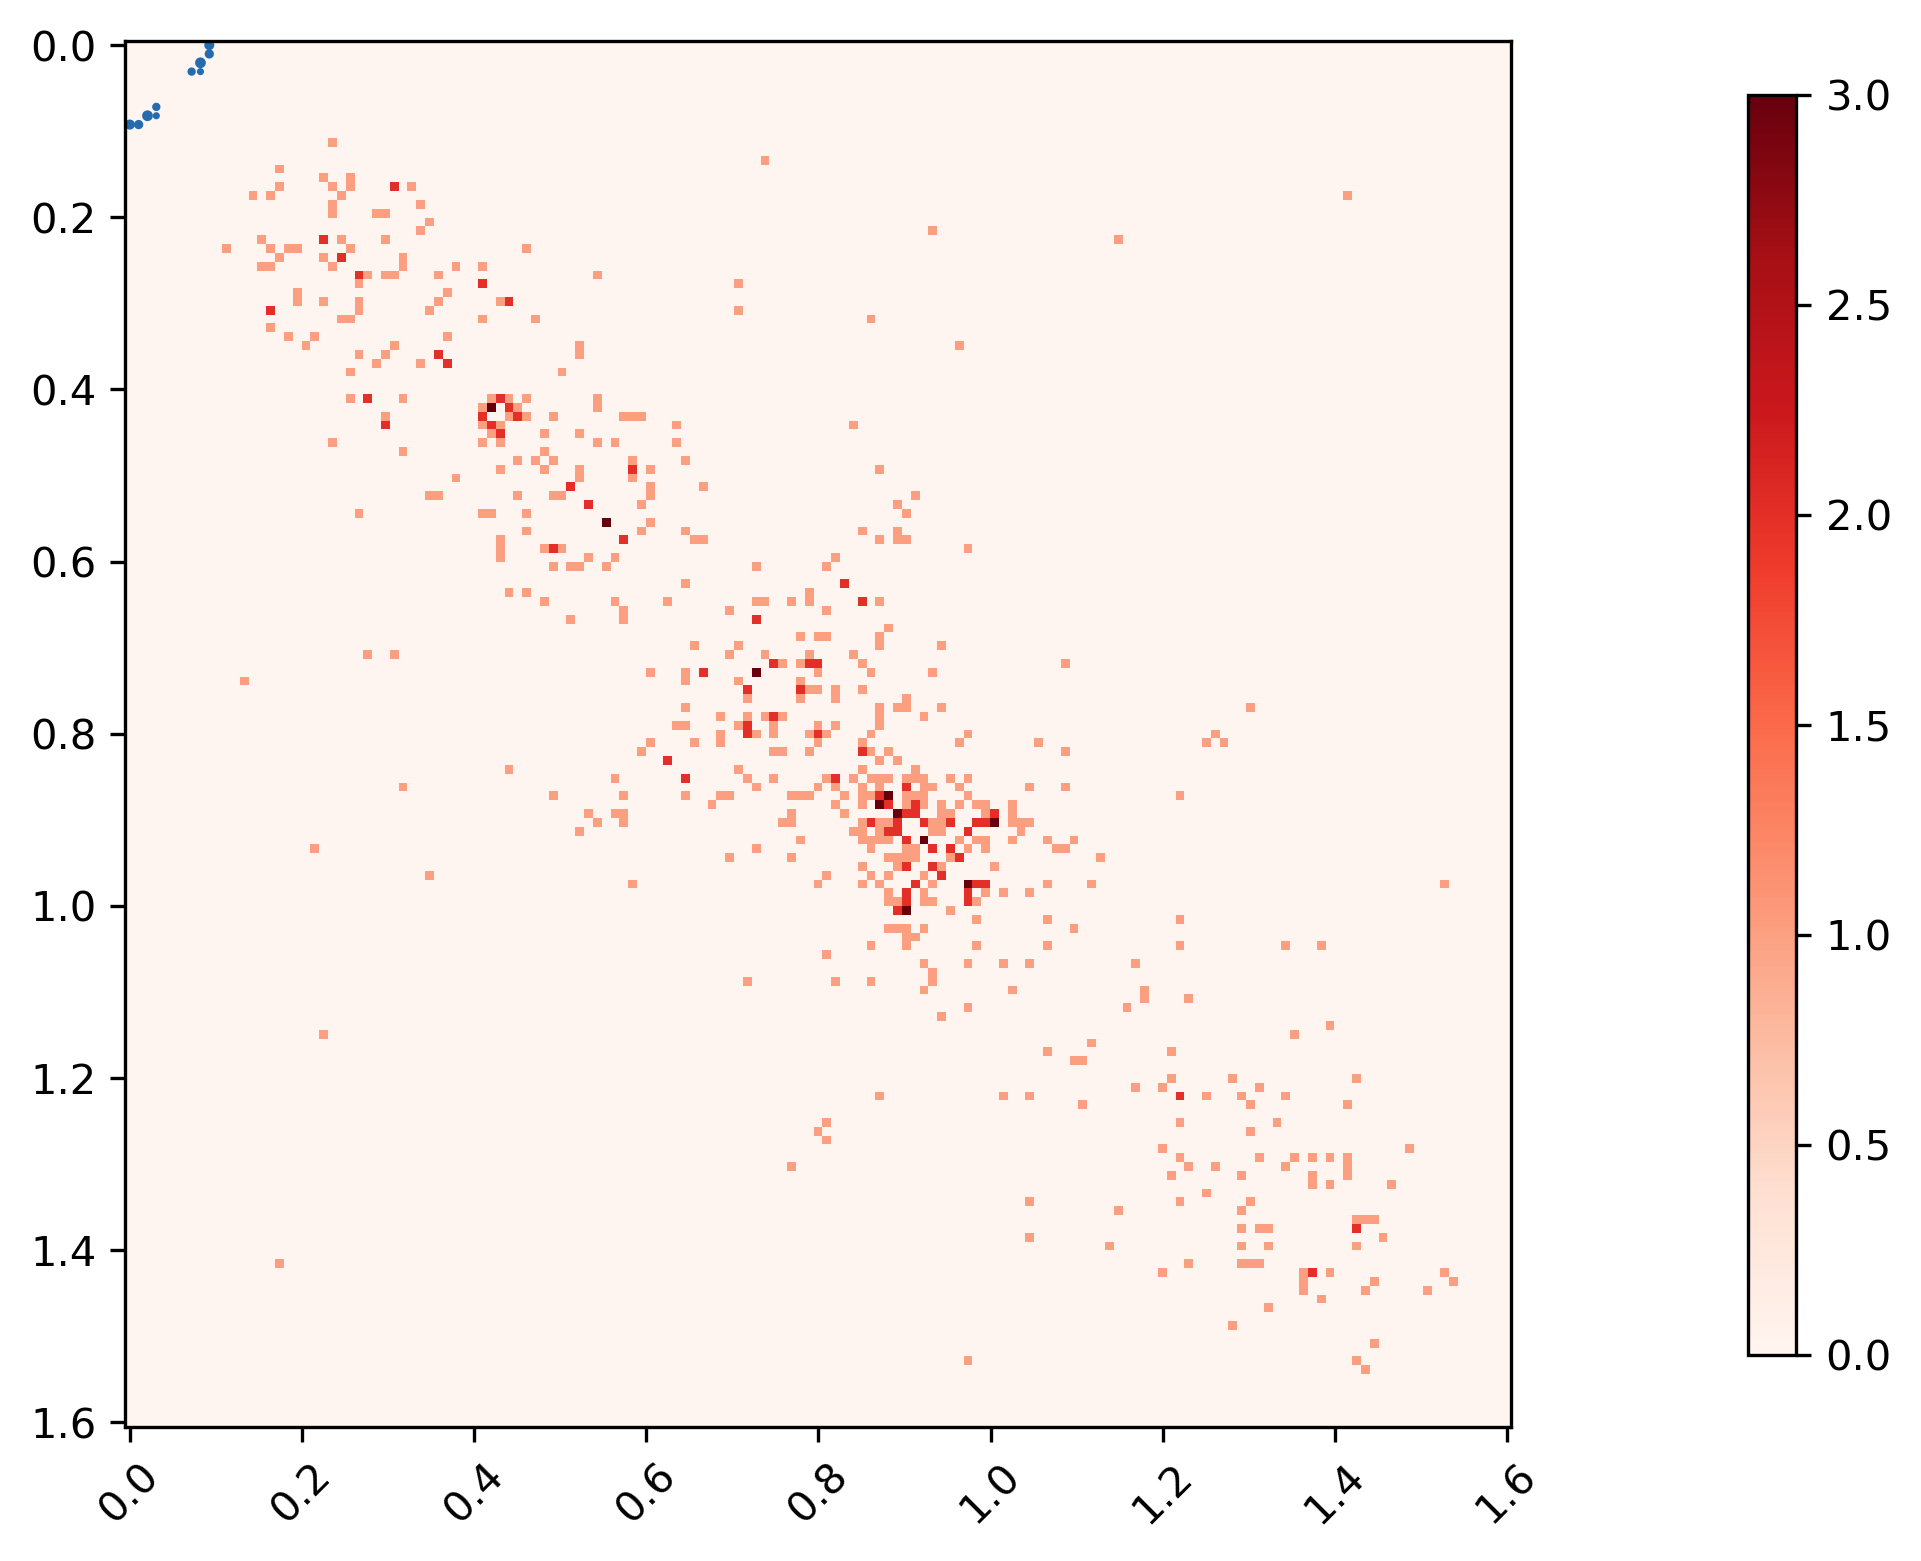

In [3]:
GSM5064740 = ["../../data/inner/GSM5064740_G1_kethoxal-mESC_M13_R01.dedup.pairs.gz"]
GSM5064741 = ["../../data/inner/GSM5064741_G1_kethoxal-mESC_M13_R02.dedup.pairs.gz"]
GSM5064742 = ["../../data/inner/GSM5064742_G1_kethoxal-mESC-refold_M13_R01.dedup.pairs.gz"]
GSM5064743 = ["../../data/inner/GSM5064743_G1_kethoxal-mESC-refold_M13_R02.dedup.pairs.gz"]
fig = plt.figure(figsize=(8,6),dpi=300)
ax:plt.Axes = plt.subplot()

# KARR-seq (Left)
plot_contactmap(GSM5064740, p_chrom1="NM_026007.4", p_resolution=10, p_max=3, p_figsize=(6, 6),
                p_structure=False, p_display="full", p_balance=False,
                p_dot_size=0.5, f_dot="../../data/rfam/dot/terc.dot",
                f_fasta = "/ChIP_seq_2/Data/index/Mus_musculus/NCBI/GRCm38.p6/mm10refseq.fa",
                f_size="/ChIP_seq_2/Data/index/Mus_musculus/NCBI/GRCm38.p6/mm10refseq.fa.fai", p_ax=(fig, ax), p_verbose=False)


Clustering chimeric reads and classifying them into loops, left stripes and right stripes

In [ ]:
from clustering.cluster_pairs import cluster_chimeric_pairs
data_txt = "data/pairs/hrefseq/MAPQ1_SPAN0/G1_kethoxal-HepG2-refold_M13_R01.txt.gz"

dict_kwargs = {
    "p_iid": "NM_001404", "p_genome": None, 
    "p_long": 200, "p_span": 10, "p_overlap": 10, "p_min_reads": 3, 
    "p_min_interactions": 200, "p_max_interactions": 20000, 
    "f_sizes": None, "f_tsne": None, "f_pairs": data_txt, "f_output": None, "f_bed": None
}
results = cluster_chimeric_pairs(**dict_kwargs)

KeyError: None

Plotting Contactmaps with ArcBands

In [ ]:
data_mouse = ["data/pairs/mrefseq/MAPQ1_SPAN0/G1_kethoxal-mESC-refold_M13_R01.dedup.pairs.gz", 
              "data/pairs/mrefseq/MAPQ1_SPAN0/G1_kethoxal-mESC-refold_M13_R02.dedup.pairs.gz"]

f_cluster_mouse = "../G1_kethoxal-mESC-refold_M13_C01.dedup.classification.txt"

plot_contactmap_w_arcbands(data_mouse, f_cluster_mouse, p_chrom1="NM_026007.4", p_resolution=25, p_max=3, p_figsize=(10, 10),
                           p_structure=True, p_genome=None, p_display="upper", p_balance=False,
                           f_fasta = "data/reference/mm10/mm10_refseq.fa",
                           f_size = "data/reference/mm10/mm10_refseq.sizes",
                           p_dot_size=1.0, p_multi=False, p_verbose=False)